# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [7]:
df = pd.read_csv('./Data/airbnb_listings.csv', index_col=0)

/var/folders/t5/32lf07552cxg6mm6y5y695hr0000gp/T/ipykernel_41237/1760161472.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Data/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [8]:
# Q1
with pd.option_context('display.max_columns', None):
     display(df.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [28]:
count_null = df.isnull().sum()
count_null[count_null > 0].sort_values(ascending=False)

df.shape

(50796, 54)

In [31]:
# Q2
count_null = df.isnull().sum()
count_null = pd.DataFrame(count_null[count_null > 0].sort_values(ascending=False), columns=['Num of Nulls'])
nullRate = count_null / df.shape[0] * 100

count_null['Rate of Nulls'] = nullRate
count_null

,Num of Nulls,Rate of Nulls
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

In [98]:
lst = list(count_null.index)
lst

['jurisdiction_names',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'host_response_rate',
 'host_response_time',
 'security_deposit',
 'host_acceptance_rate',
 'review_scores_value',
 'review_scores_location',
 'review_scores_checkin',
 'review_scores_accuracy',
 'review_scores_communication',
 'review_scores_cleanliness',
 'review_scores_rating',
 'reviews_per_month',
 'beds',
 'bedrooms',
 'bathrooms',
 'host_identity_verified',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_is_superhost',
 'host_has_profile_pic']

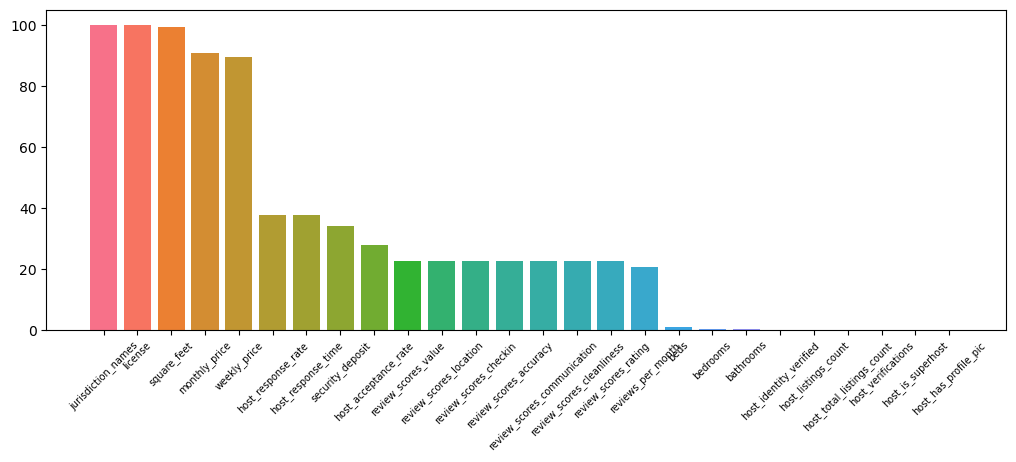

In [113]:
# Q3
# count_null['Rate of Nulls'].plot.bar()
# count_null.shape
x = range(count_null.shape[0])
y = count_null['Rate of Nulls']
colors = sns.color_palette('husl', count_null.shape[0])
lst = count_null.index

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0.8, 0.8, 0.8, 0.8])

ax.bar(x, y, color=colors)
ax.set_xticks(range(26), lst, fontsize=7, rotation=45)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [38]:
# Q4

df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [39]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [40]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<BarContainer object of 4 artists>

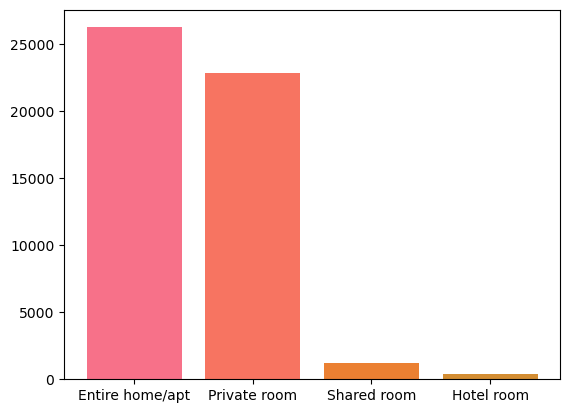

In [121]:
# Q5
rooms = df.room_type.value_counts()
plt.bar(rooms.index, rooms.values, color=colors)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

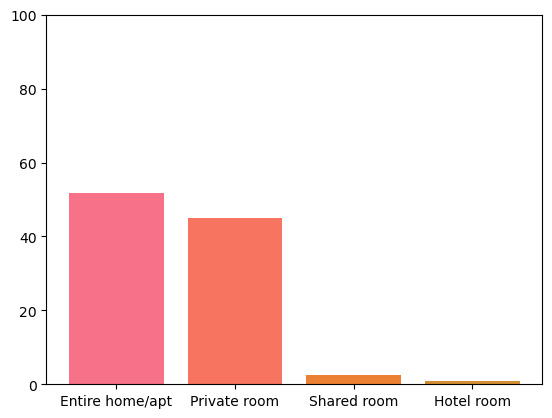

In [134]:
# Q6
rooms_rate = rooms / rooms.sum() * 100
plt.bar(rooms_rate.index, rooms_rate.values, color=colors)
plt.ylim(0, 100)
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

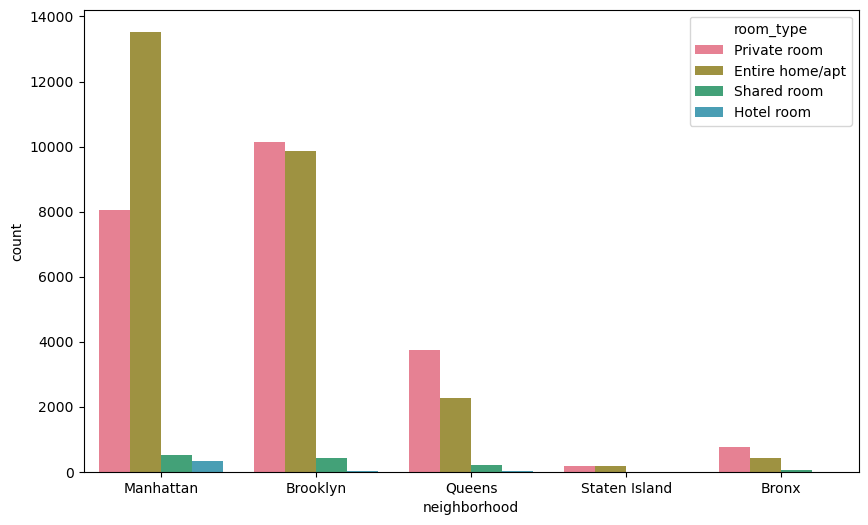

In [202]:
# Q7

regionRoom = df[['room_type', 'neighborhood']]
palette = sns.color_palette("husl", len(df['neighborhood'].unique()))

plt.figure(figsize=(10,6))
sns.countplot(x='neighborhood', hue='room_type', data=regionRoom, palette=palette)
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

/var/folders/t5/32lf07552cxg6mm6y5y695hr0000gp/T/ipykernel_41237/3671091545.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='neighborhood', y='price', data=priceRegion, palette=palette)


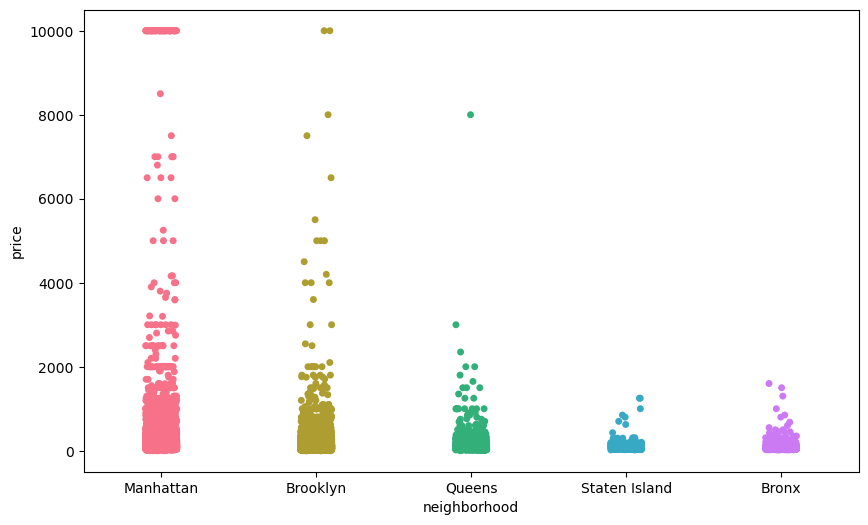

In [196]:
# Q8

priceRegion = df[['price', 'neighborhood']]
palette = sns.color_palette("husl", len(df['neighborhood'].unique()))

plt.figure(figsize=(10,6))
sns.stripplot(x='neighborhood', y='price', data=priceRegion, palette=palette)
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9

# 맨해튼에 가격이 10000인 이상값들이 있다. 

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

<Axes: xlabel='accommodates', ylabel='Count'>

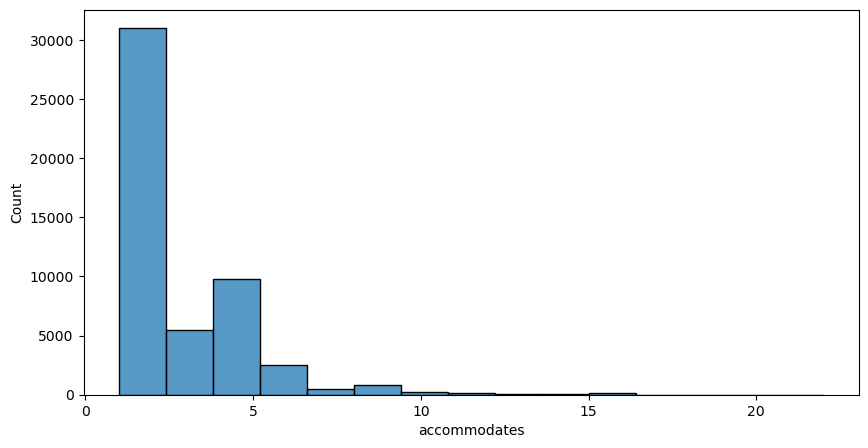

In [222]:
# Q10
plt.figure(figsize=(10,5))
sns.histplot(data = df['accommodates'], binwidth=1.4)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(0.0, 1000.0)

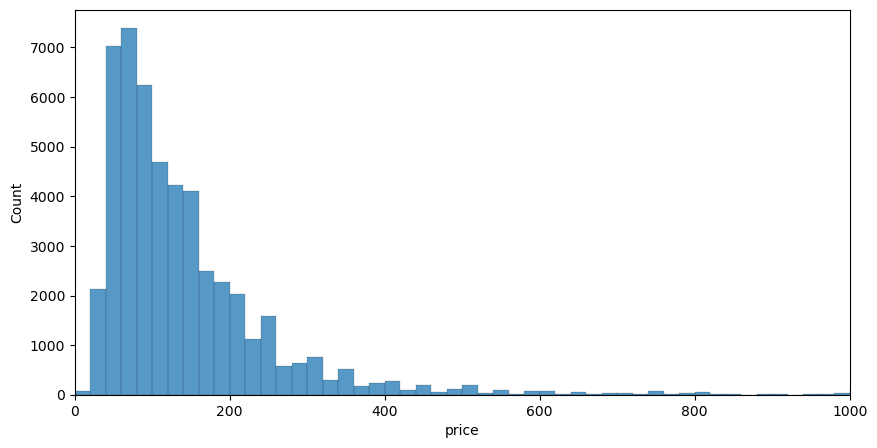

In [236]:
# Q10
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df['price'], binwidth=20)
ax.set_xlim(0, 1000)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [4]:
df = pd.read_csv('./Data/airbnb_listings.csv', index_col=0)

/var/folders/t5/32lf07552cxg6mm6y5y695hr0000gp/T/ipykernel_56434/1760161472.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Data/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [28]:
#Q12

def handle_null(df):
    # 각 column 결측치 비율
    null_rate = df.isnull().mean()
    
    # 결측치 25% 이상
    col_to_drop = null_rate[null_rate >= 0.25].index
    df = df.drop(columns=col_to_drop)
    
    # 결측치 10% ~ 25%
    row_to_drop = df[df.isnull().sum(axis=1) >= 0.1 * df.shape[1]].index
    df = df.drop(index=row_to_drop)
    
    # 결측치 10% 미만
    columns_to_impute = null_rate[(null_rate < 0.1) & (null_rate > 0)].index
    for column in columns_to_impute:
        # 숫자가 아닌 값들은 NaN으로 변환
        df[column] = pd.to_numeric(df[column], errors='coerce')
        # 중앙값 계산
        median_value = df[column].median()
        # 중앙값이 NaN이 아니면 결측치 대체
        if not pd.isna(median_value):
            df[column].fillna(median_value, inplace=True)
    
    
    return df
    
    
new = handle_null(df)
display(df.shape)
display(new.shape)
new

(50796, 54)

(39347, 45)

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,NaN,6.0,6.0,NaN,NaN,NaN,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,NaN,1.0,1.0,NaN,NaN,NaN,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,NaN,1.0,1.0,NaN,NaN,NaN,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,NaN,3.0,3.0,NaN,NaN,NaN,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5121,NaN,1.0,1.0,NaN,NaN,NaN,Brooklyn,40.68688,-73.95596,...,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,NaN,0.0,0.0,NaN,NaN,NaN,Queens,40.74024,-73.82093,...,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,NaN,1.0,1.0,NaN,NaN,NaN,Brooklyn,40.68645,-73.93803,...,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,NaN,0.0,0.0,NaN,NaN,NaN,Manhattan,40.83212,-73.94180,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,NaN,10.0,10.0,NaN,NaN,NaN,Manhattan,40.76166,-73.99113,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [ ]:
#Q13-1)


In [ ]:
#Q13-2)


In [ ]:
#Q13-3)


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
